# 2022-08-19: Texture Extraction Using Local Binary Patterns

### Authors

* Kevin Chu (kevin@velexi.com)


### Overview

This Jupyter notebook explores texture extraction from images using Local Binary Patterns (LBP).


### Function Signature

* __input__: grayscale image (stored as 2D numpy arrays)

* __output__: grayscale image of LBP image, LGP histogram

* __data processing__: compute the LBP image and LGP histogram for the input image

## History

### 2022-08-19

- Initial version of notebook.

## Data Processing Functions

#### `compute_lbp()`

In [1]:
# --- Imports

# Standard library

# External packages
import cv2
import numpy as np
import skimage

# --- Function

def compute_lbp(image: np.ndarray, radius=3, num_points=None) -> np.ndarray:
    """
    Compute local binary patterns (LBP) for image using "uniform" method.
    
    Parameters
    ----------
    image: grayscale image
    
    radius: radius of circle used to compute local binary patterns. 

    num_points: number of points on circle used to compute local binary patterns. If
        num_points is set to None, (3 * radius) points are used to compute LBP values.

    Return values
    -------------
    lbp: grayscale image with pixel values equal to local binary pattern (LBP) values
    
    hist: histogram of LBP values
    """
    # --- Check arguments
    
    # Set num_points
    if num_points is None:
        num_points = 3 * radius

    # Convert pixel values to the interval [0, 1) with type 'integer'
    if image.dtype == 'float32':
        if np.max(image) > 1:
            image = (255*image).astype('int')

    # --- Compute LBP image

    lbp = skimage.feature.local_binary_pattern(
        image, num_points, radius, method="uniform")
    
    # --- Compute LBP histogram
    
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, num_points + 3),
                             range=(0, num_points + 2),
                             density=True)
    
    return lbp, hist

In [2]:
# --- Unit Tests

# ------ Parameters

# Image paramaters
dims = (100, 200)

# ------ Pixel value range: [0, 1)

# Preparations
image = 0.25 * np.ones(dims).astype('float32')

# LBP parameters
radius = 3

# Exercise functionality
lbp, lbp_hist = compute_lbp(image, radius)

# Check results
assert(isinstance(lbp, np.ndarray))
assert(lbp.shape == dims)

assert(len(lbp_hist) == 3 * radius + 2)
assert(sum(lbp_hist) == 1)

# ------ Pixel value range: [0, 255)


# Preparations
image = 128 * np.ones(dims).astype('int')

# LBP parameters
radius = 3
num_points = 12

# Exercise functionality
lbp, lbp_hist = compute_lbp(image, radius, num_points)

# Check results
assert(isinstance(lbp, np.ndarray))
assert(lbp.shape == dims)

assert(len(lbp_hist) == num_points + 2)
assert(sum(lbp_hist) == 1)

#### `compute_lbp_histogram()`

## Experimentation & Development

In [3]:
#### Experiment Configuration

# Set data pipeline function
pipeline_func = compute_lbp

### Imports

In [4]:
# --- Imports

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFilter
from skimage.color import rgb2gray
import seaborn as sns

### Parameters

In [5]:
# LBP parameters
radius = 3
num_points = 8 * radius

### Prepare Data

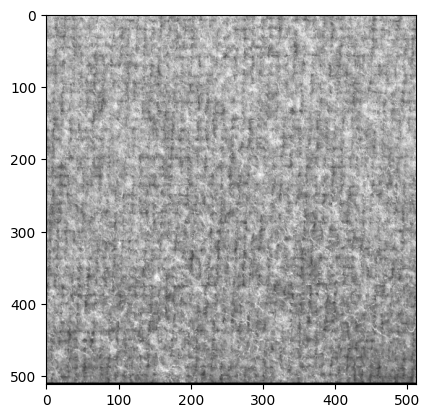

In [6]:
# --- Load image for experiment

# Load image
image_path = os.path.join("..", "data", "source", "pipeline-component-development",
                          "textures", "1.1.05.tiff")

image_color = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Convert to grayscale
image = rgb2gray(image_color)

# Check image
plt.imshow(image, cmap="gray")
plt.show()

assert(len(image.shape) == 2)

### Process Data

In [7]:
# Execute data pipeline component
lbp, lbp_hist = pipeline_func(image, radius=radius, num_points=num_points)

### Display Output

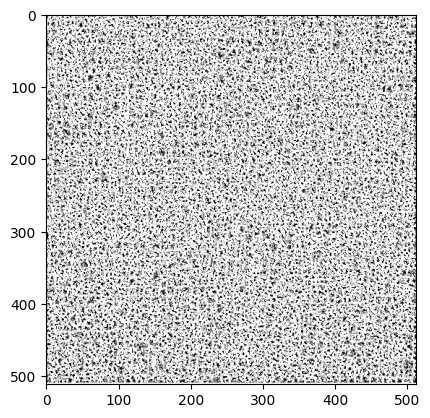

In [8]:
# Display output image
plt.imshow(lbp, cmap="gray")
plt.show()

### Analyze Results

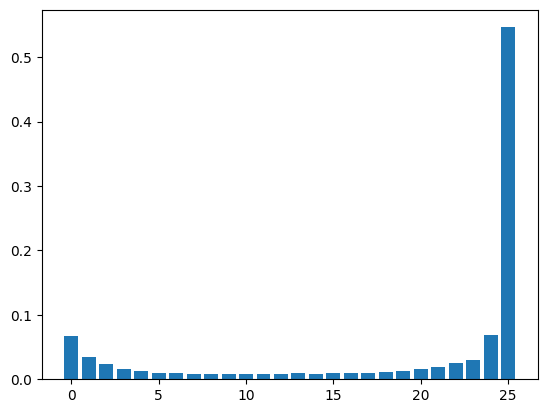

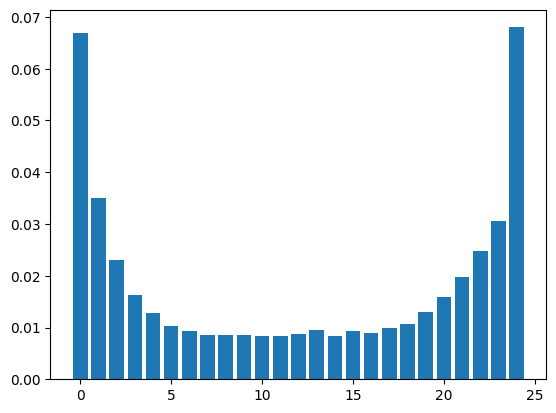

In [9]:
# --- Preprations

lbp_values = range(len(lbp_hist))

# --- Generate plots

# Including non-uniform patterns
plt.figure()
plt.bar(lbp_values, lbp_hist);

# Excluding non-uniform patterns
plt.figure()
plt.bar(lbp_values[0:-1], lbp_hist[0:-1]);